In [1]:
# # Pandas Lab: Titanic

# This week was all about Pandas and plotting. At this point you should be chomping at the bit to do some Data Science. If so, good!

# For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.


# ## Prework
# Fork and clone this repo. At the end of this project, you'll submit a pull request containing an iPython notebook that answers the questions below.

In [2]:
# ## Step 1: Reading the data

# 1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
# 2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
# 4. Download the `train.csv` file into this project
# 3. Create an iPython notebook and load the csv into pandas.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# ## Step 2: Cleaning the data
# 1. Create a bar chart showing how many missing values are in each column
# 2. Which column has the most `NaN` values? How many cells in that column are empty?
# 3. Delete all rows where `Embarked` is empty
# 4. Fill all empty cabins with **Â¯\\_(ãƒ„)_/Â¯**

# Note: `NaN`, empty, and missing are synonymous.

In [11]:

nulls =  df.isnull().sum()
nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
objects = df.dtypes
objects

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

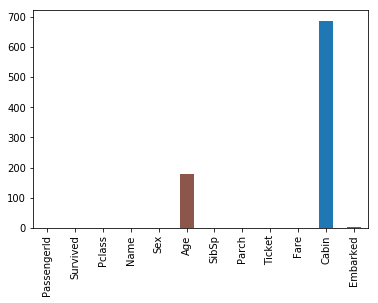

In [13]:
nulls.plot(kind='bar')

2. Which column has the most NaN values?

How many cells in that column are empty?

A: The cabin column has the most 'NaN' values. It has 687 empty cells.

In [14]:
# 3. Delete all rows where `Embarked` is empty

In [15]:
df.dropna(subset=['Embarked'], how='any', inplace=True)

In [16]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:

# 4. Fill all empty cabins with **Â¯\\_(ãƒ„)_/Â¯**# 4. Fill 
df['Cabin'].fillna('¯\(ツ)/¯', inplace=True)

In [18]:
# ## Step 3: Feature extraction
# 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
# 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
# 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
#   - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
#   - Do the same thing for `Sex`
#   - BONUS: Extract the title from everyone's name and create dummy columns

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


In [20]:
# 1. Create a new column called `FamilyCount` which will be the sum of those two columns
df['FamilyCount'] = df['SibSp'] + df['Parch']

In [28]:
thing = df[df['Name'].str.contains('Rev')]

In [29]:
thing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0


In [27]:
# 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
df['IsReverend'] = df['Name'].str.contains('Rev')

In [28]:
df['IsReverend'] = df['IsReverend'].astype(int)

In [29]:
df['IsReverend'].value_counts()

0    883
1      6
Name: IsReverend, dtype: int64

In [30]:
#In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
#   - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
#   - Do the same thing for `Sex`
#   - BONUS: Extract the title from everyone's name and create dummy columns

In [31]:
embarked_dummies = pd.get_dummies(df[['Embarked']])

In [32]:
df1 = pd.concat([df, embarked_dummies], axis=1)

In [33]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


In [34]:
sex_dummies = pd.get_dummies(df1[['Sex']])
df2 = pd.concat([df1, sex_dummies], axis=1)
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1


In [35]:
# ## Step 4: Exploratory analysis
# 1. What was the survival rate overall?   
# 2. Which gender fared the worst? What was their survival rate? 
# 3. What was the survival rate for each `Pclass`?
# 4. Did any reverends survive? How many?
# 5. What is the survival rate for cabins marked **Â¯\\_(ãƒ„)_/Â¯**
# 6. What is the survival rate for people whose `Age` is empty?
# 7. What is the survival rate for each port of embarkation?
# 8. What is the survival rate for children (under 12) in each `Pclass`?
# 9. Did the captain of the ship survive? Is he on the list?
# 10. Of all the people that died, who had the most expensive ticket? How much did it cost?
# 11. Does having family on the boat help or hurt your chances of survival?

In [36]:
# 1. What was the survival rate overall?   A: 38.2% survivial rate
df2[['Survived']].mean()

Survived    0.382452
dtype: float64

In [37]:

# 2. Which gender fared the worst? What was their survival rate? # 2. Whic 
# A: males fared the worst, 18.9% survivial rate
gender = df2.groupby('Sex')
gender.mean()[['Survived']]

,Survived
Sex,
female,0.740385
male,0.188908


In [38]:
# 3. What was the survival rate for each `Pclass`?
# A: 
 
df2.groupby('Pclass')[['Survived']].mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [39]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [40]:
# 4. Did any reverends survive? How many? 
# A: No
df2.groupby('IsReverend')[['Survived']].mean()

,Survived
IsReverend,
0,0.385051
1,0.000000


In [41]:
# 5. What is the survival rate for cabins marked **Â¯\\_(ãƒ„)_/Â¯**
# A: 30%

df2.groupby('Cabin').mean()[['Survived']].filter(like='¯\(ツ)/¯', axis=0)

,Survived
Cabin,
¯\(ツ)/¯,0.299854


In [42]:
# 6. What is the survival rate for people whose `Age` is empty?
# A: 29.4%
df_age_nulls = df2

In [43]:
df_age_nulls['Age'].fillna('null')
df_age_nulls.groupby('Age').mean()[['Survived']].filter(like='null', axis=0)

,Survived
Age,


In [44]:
# 7. What is the survival rate for each port of embarcation?

df2.groupby('Embarked')[['Survived']].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [45]:
df2['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [46]:
# 8. What is the survival rate for children (under 12) in each `Pclass`?
# A: 1 - 75%, 2 - 100%, 3 - 40.4%

df2.loc[df2['Age'] < 12, :].groupby('Pclass').mean()[['Survived']]

,Survived
Pclass,
1,0.750000
2,1.000000
3,0.404255


In [47]:
# 9. Did the captain of the ship survive? Is he on the list?
# He is not on the list because there are no null values under 
# 'Ticket' or 'Fare' and I don't think the captain had to pay for a ticket

df2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
FamilyCount      0
IsReverend       0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64

In [48]:

# 10. Of all the people that died, who had the most # 10. Of  
# expensive ticket? How much did it cost?
# A: The most expensive ticket of people who died is 263.00. 
# The two people who died who had that ticket are Mark Fortune and Charles Alexander Fortune
df2.groupby('Fare').mean()['Survived']

Fare
0.0000      0.066667
4.0125      0.000000
5.0000      0.000000
6.2375      0.000000
6.4375      0.000000
6.4500      0.000000
6.4958      0.000000
6.7500      0.000000
6.8583      0.000000
6.9500      0.000000
6.9750      0.500000
7.0458      0.000000
7.0500      0.000000
7.0542      0.000000
7.1250      0.000000
7.1417      1.000000
7.2250      0.250000
7.2292      0.266667
7.2500      0.076923
7.3125      0.000000
7.4958      0.333333
7.5208      0.000000
7.5500      0.250000
7.6292      0.000000
7.6500      0.250000
7.7250      0.000000
7.7292      0.000000
7.7333      0.500000
7.7375      0.500000
7.7417      0.000000
              ...   
79.6500     0.666667
81.8583     1.000000
82.1708     0.500000
83.1583     1.000000
83.4750     0.500000
86.5000     1.000000
89.1042     1.000000
90.0000     0.750000
91.0792     1.000000
93.5000     1.000000
106.4250    0.500000
108.9000    0.500000
110.8833    0.750000
113.2750    0.666667
120.0000    1.000000
133.6500    1.000000
134.5000

In [49]:
df2[df2['Fare'] == 263]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,1,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,1,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,1


In [50]:
# 11. Does having family on the boat help or hurt your chances of survival?
df2.groupby('FamilyCount').mean()[['Survived']]

,Survived
FamilyCount,
0,0.300935
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [51]:
import seaborn as sns

# ## Step 5: Plotting
# Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

In [53]:

df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilyCount',
       'IsReverend', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male'],
      dtype='object')

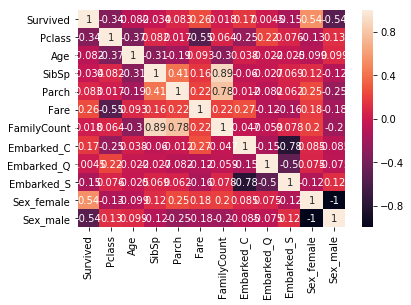

In [54]:
corr_df2 = df2[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilyCount', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']].corr()
sns.heatmap(corr_df2, annot=True)

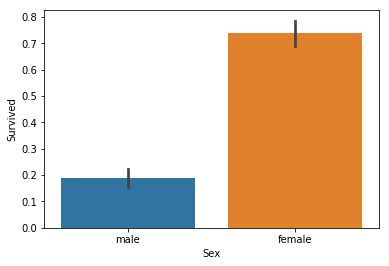

In [55]:
sns.barplot('Sex', 'Survived', data=df2)

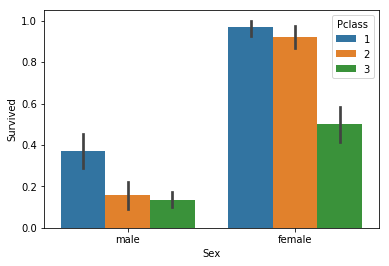

In [56]:
sns.barplot('Sex', 'Survived', hue='Pclass', data=df2)

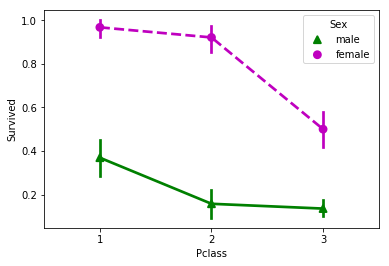

In [57]:
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df2, palette={'male':'g', 'female':'m'}, markers=['^','o'], linestyles=['-','--'])

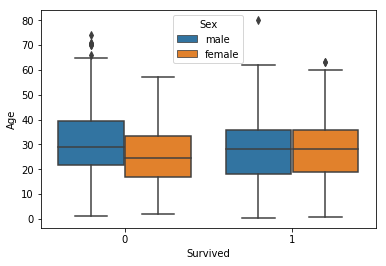

In [63]:
sns.boxplot(x = 'Survived' , y='Age', hue='Sex', data=df2)

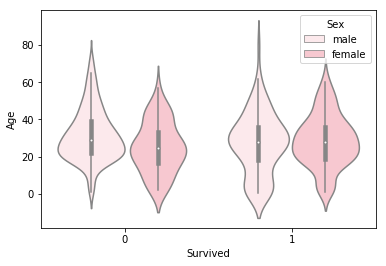

In [73]:
sns.violinplot('Survived', 'Age', hue='Sex', color = 'pink', data=df2)

Text(0.5,0,'Survival Rate')

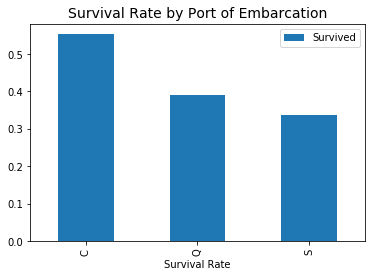

In [65]:
df2.groupby(['Embarked'])[['Survived']].mean().plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarcation',fontsize=14)
plt.xlabel('Survival Rate')

Text(0.5,0,'Survival Rate')

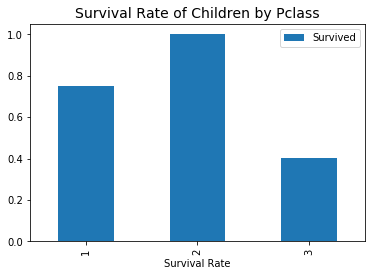

In [66]:
df2.loc[df2['Age'] < 12, :].groupby('Pclass').mean()[['Survived']].plot(kind='bar')
plt.title('Survival Rate of Children by Pclass',fontsize=14)
plt.xlabel('Survival Rate')

In [67]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df2['age_group'] = pd.cut(df2.Age, range(0, 81, 10), right=False, labels=age_labels)
df2['age_group'].value_counts()

20-29    220
30-39    166
10-19    102
40-49     89
0-9       62
50-59     48
60-69     18
70-79      6
Name: age_group, dtype: int64

Text(0.5,0,'Age Group')

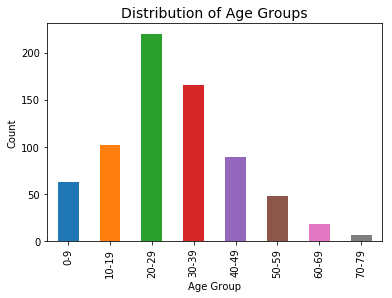

In [69]:
df2.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group')

Text(0.5,0,'Age Group')

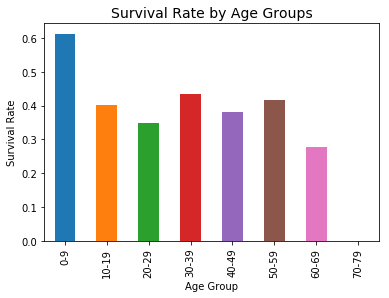

In [70]:
df2.groupby(['age_group'])['Survived'].mean().plot(kind='bar',stacked=True)
plt.title("Survival Rate by Age Groups",fontsize=14)
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')

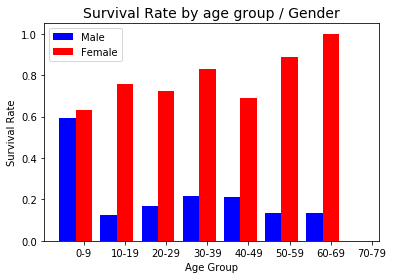

In [72]:

male_data = df2[df2.Sex == "male"].groupby('age_group').Survived.mean()
female_data = df2[df2.Sex == "female"].groupby('age_group').Survived.mean()
ax = plt.subplot()
male_plt_position = np.array(range(len(age_labels)))
female_plt_position = np.array(range(len(age_labels)))+0.4
ax.bar(male_plt_position, male_data,width=0.4,label='Male',color='b')
ax.bar(female_plt_position, female_data,width=0.4,label='Female',color='r')
tick_spacing = np.array(range(len(age_labels)))+0.4
plt.xticks(tick_spacing, age_labels)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Age Group")
ax.set_title("Survival Rate by age group / Gender",fontsize=14)
plt.legend()
plt.show()